In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras import layers, models, regularizers, Input

In [ ]:
df = pd.read_csv('Attrition.csv')

print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...

In [ ]:
df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True, errors='ignore')


/tmp/ipython-input-317509737.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_count.index, y=attrition_count.values, palette=["#ffb563","#FFC0CB"])


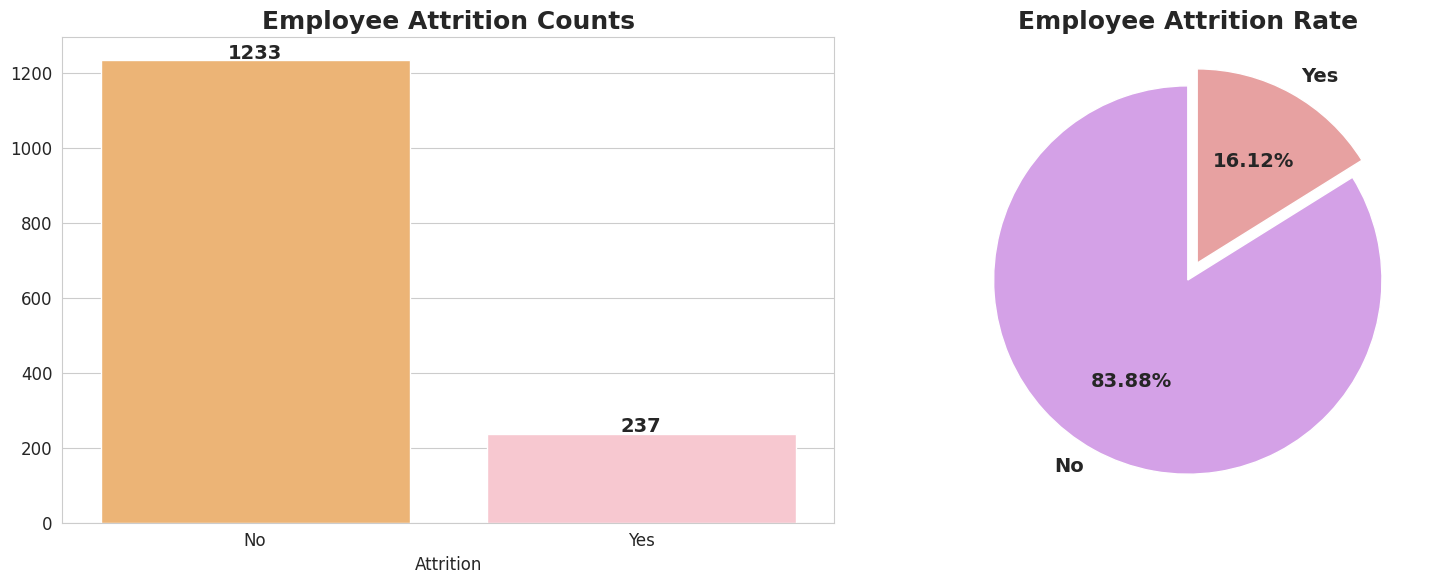

In [ ]:
plt.figure(figsize=(16,6))

# Counts barplot
plt.subplot(1,2,1)
attrition_count = df['Attrition'].value_counts()
sns.barplot(x=attrition_count.index, y=attrition_count.values, palette=["#ffb563","#FFC0CB"])
plt.title("Employee Attrition Counts", fontweight="bold", fontsize=18)
for i, v in enumerate(attrition_count.values):
    plt.text(i, v+5, str(v), ha='center', fontweight='bold', fontsize=14)

# Percentage pie chart
plt.subplot(1,2,2)
plt.pie(attrition_count, labels=attrition_count.index, autopct="%.2f%%",
        colors=["#D4A1E7","#E7A1A1"], startangle=90, explode=[0,0.1], textprops={'fontsize':14, 'fontweight':'bold'})
plt.title("Employee Attrition Rate", fontweight="bold", fontsize=18)

plt.tight_layout()
plt.show()


/tmp/ipython-input-1800048784.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Attrition", y="Age",


<Figure size 1600x600 with 0 Axes>

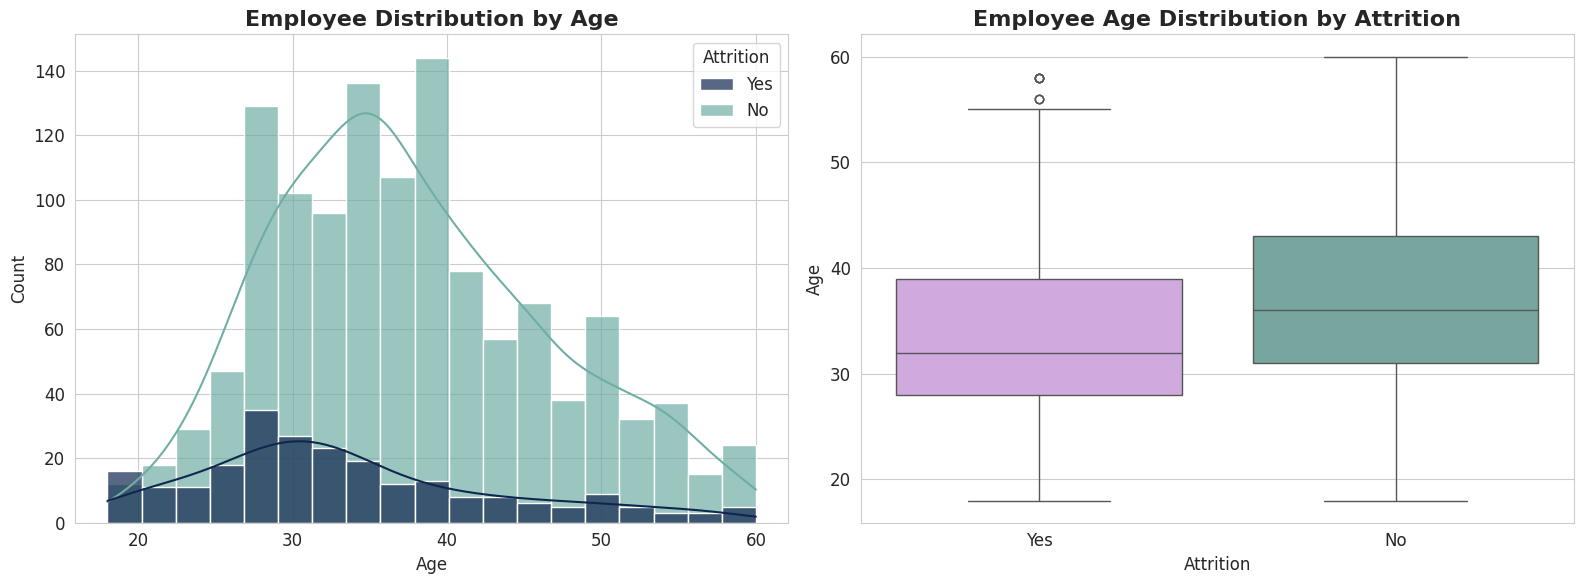

In [ ]:
plt.figure(figsize=(16,6))

# -----------------------------
# 2. Distribution by Age
# -----------------------------
plt.figure(figsize=(16,6))

# Histogram with KDE
plt.subplot(1,2,1)
sns.histplot(data=df, x="Age", hue="Attrition", kde=True,
             palette=["#11264e","#6faea4"], alpha=0.7)
plt.title("Employee Distribution by Age", fontsize=16, fontweight='bold')

# Boxplot
plt.subplot(1,2,2)
sns.boxplot(data=df, x="Attrition", y="Age",
            palette=["#D4A1E7","#6faea4"])
plt.title("Employee Age Distribution by Attrition", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


/tmp/ipython-input-3254035469.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Attrition', y=feature, data=df, palette=num_palette, alpha=0.6, jitter=True)


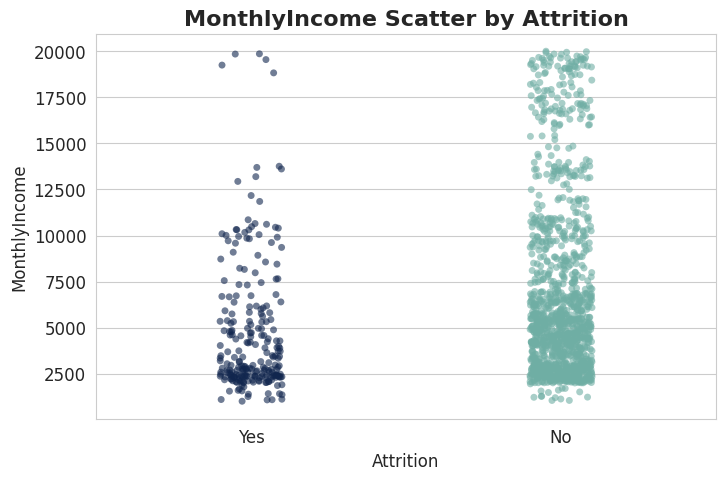

In [ ]:
def plot_strip(feature):
    plt.figure(figsize=(8,5))
    sns.stripplot(x='Attrition', y=feature, data=df, palette=num_palette, alpha=0.6, jitter=True)
    plt.title(f"{feature} Scatter by Attrition", fontsize=16, fontweight="bold")
    plt.show()

plot_strip("MonthlyIncome")


/tmp/ipython-input-2147036729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y=feature, data=df, palette=num_palette, inner="quartile")


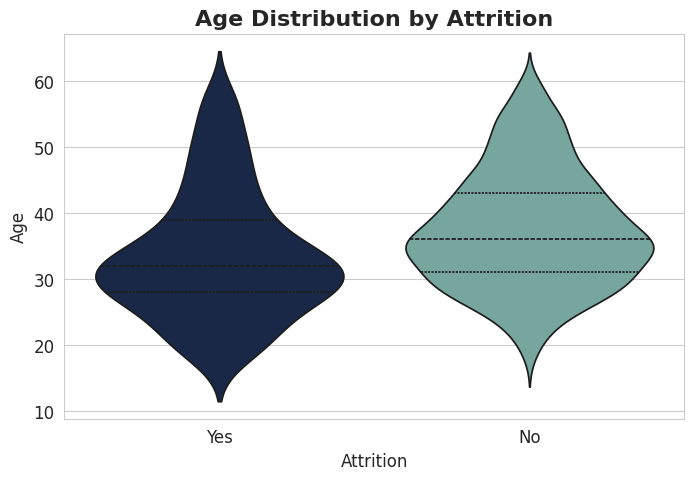

In [ ]:
def plot_violin(feature):
    plt.figure(figsize=(8,5))
    sns.violinplot(x='Attrition', y=feature, data=df, palette=num_palette, inner="quartile")
    plt.title(f"{feature} Distribution by Attrition", fontsize=16, fontweight="bold")
    plt.show()

plot_violin("Age")


/tmp/ipython-input-3401807382.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Attrition', y=feature, data=df, palette=num_palette)


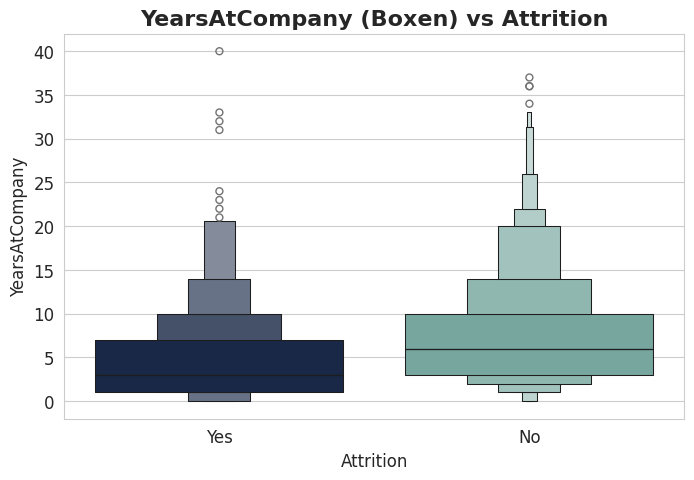

In [ ]:
def plot_boxen(feature):
    plt.figure(figsize=(8,5))
    sns.boxenplot(x='Attrition', y=feature, data=df, palette=num_palette)
    plt.title(f"{feature} (Boxen) vs Attrition", fontsize=16, fontweight="bold")
    plt.show()

plot_boxen("YearsAtCompany")


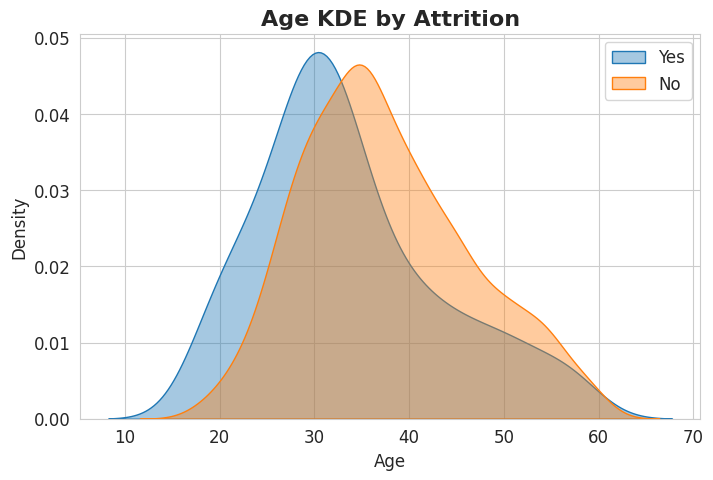

In [ ]:
def plot_kde(feature):
    plt.figure(figsize=(8,5))
    for label in df["Attrition"].unique():
        subset = df[df["Attrition"] == label]
        sns.kdeplot(subset[feature], label=label, fill=True, alpha=0.4)
    plt.title(f"{feature} KDE by Attrition", fontsize=16, fontweight="bold")
    plt.legend()
    plt.show()

plot_kde("Age")


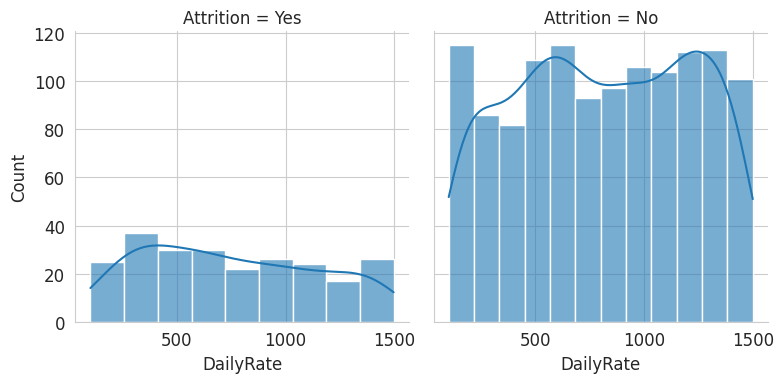

In [ ]:
def plot_facet(feature):
    g = sns.FacetGrid(df, col="Attrition", palette=num_palette, height=4)
    g.map(sns.histplot, feature, kde=True, alpha=0.6)
    plt.show()

plot_facet("DailyRate")


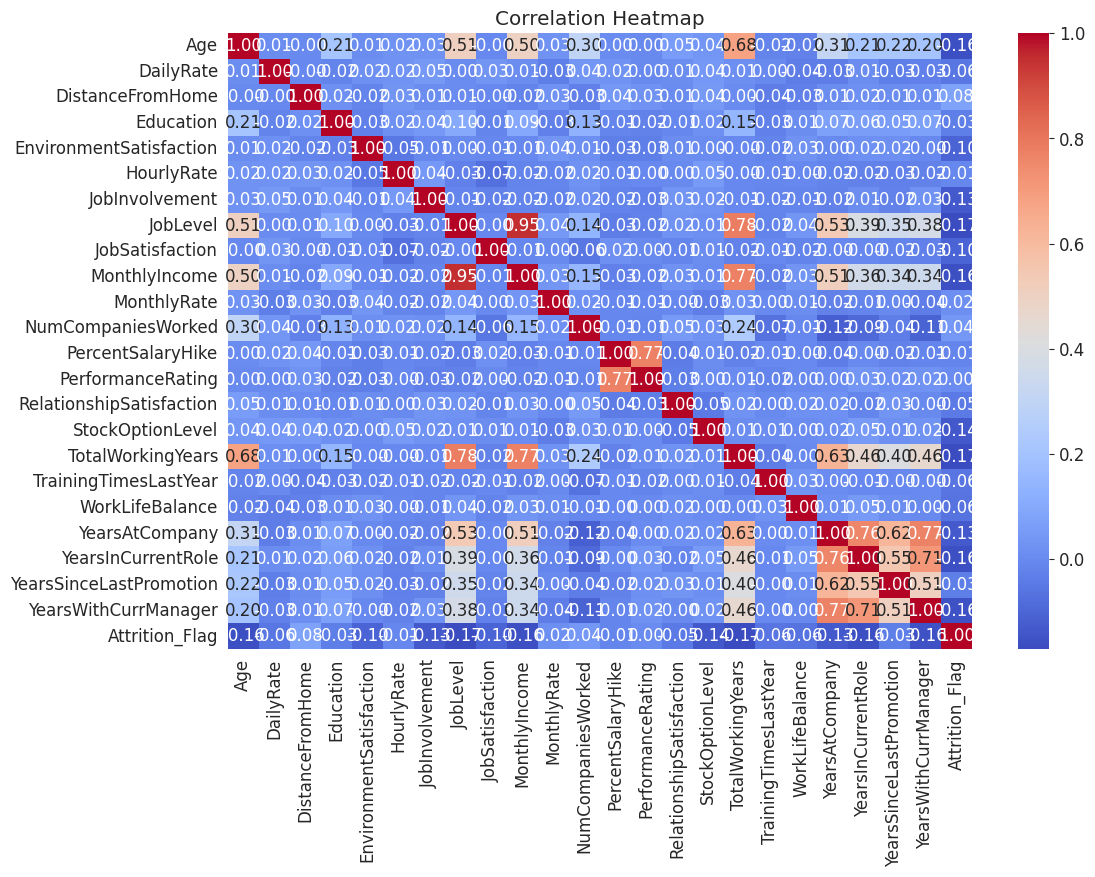

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()